# Introduction to Scikit-Learn and Pandas

Artifical Intelligence and Machine Learning Symposium at OU  
Univeristy of Oklahoma Memorial Union Ballroom  
September 25, 2019 
Author: Keerti Banweer <keerti.banweer@ou.edu> 

## Overview: Regression (Boston housing dataset)

Below are the topics that will be covered:
1. Load the dataset using sklearn.datasets
2. Describe the dataset using DESCR
3. Check for missing values using numpy functions isnan() and any()
4. Scale the data using sklearn scaler (we will be using min max scaler)
5. regression
    1. build the models
    using sklearn packages: linear regression, SGD regressor, LASSO and Elastic net
    2. Evaluate the predictions, check accuracy
    3. compare different models using cross validation (sklearn.model_selection.cross_validate )
    
    
### General References
* [Sci-kit Learn API](https://scikit-learn.org/stable/modules/classes.html)
    

## Imports

In [12]:
"""
This section will import all the required packages

"""

# Index of skleanr datasets https://scikit-learn.org/stable/datasets/index.html#datasets
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
from sklearn.datasets import load_boston, load_iris
from sklearn import cluster, datasets

import numpy as np
import pandas as pd
import itertools 
import time

from matplotlib import rcParams, pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, roc_curve

from sklearn.metrics.cluster import contingency_matrix 
from sklearn.metrics.pairwise import paired_euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.manifold import TSNE

from sklearn.cluster import KMeans

%matplotlib inline
%reload_ext autoreload
%autoreload 2

rcParams['figure.figsize'] = (8, 8)

globalStart = time.time()

## Load dataset 

In [3]:
"""
We will be using boston dataset
load_boston()
Using functtions such as keys() and DESCR
"""

boston_data = datasets.load_boston()

# function keys() will display the keys in dataset 
## dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
print(boston_data.keys())

# Using DESCR function, we can display the dataset description with list of features and target
print(boston_data.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [4]:
# In this section, we will setup variables and store data and target information
X = boston_data.data #data key contains the data of all the features
y = boston_data.target

feature_names = boston_data.feature_names # list of all the attributes
target_names = ['MEDV']  #target column name

"""
This section, we will print out the dimensions of the data
"""
print ("SETUP the data")
print (X.shape, y.shape)
print ("Features: \n" + str(feature_names))
print ("Targets: \n" + str(target_names))

"""
convert the dataset load to a dataframe using pandas
Pandas provide multiple functionality for accessing 
and utilizing data efficiently
"""
data_housing = pd.DataFrame(X, columns = boston_data.feature_names)


SETUP the data
(506, 13) (506,)
Features: 
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Targets: 
['MEDV']


In [7]:
#this section will check for any missing values
np.any(np.isnan(data_housing))

False

In [8]:
""" 
Store the number of samples and the number of features, by
accessing the values from the shape of X
"""
nsamples = X.shape[0]
nfeatures = X.shape[1]

print("Number of samples: " + str(nsamples))
print("Number of features: " + str(nfeatures))

Number of samples: 506
Number of features: 13


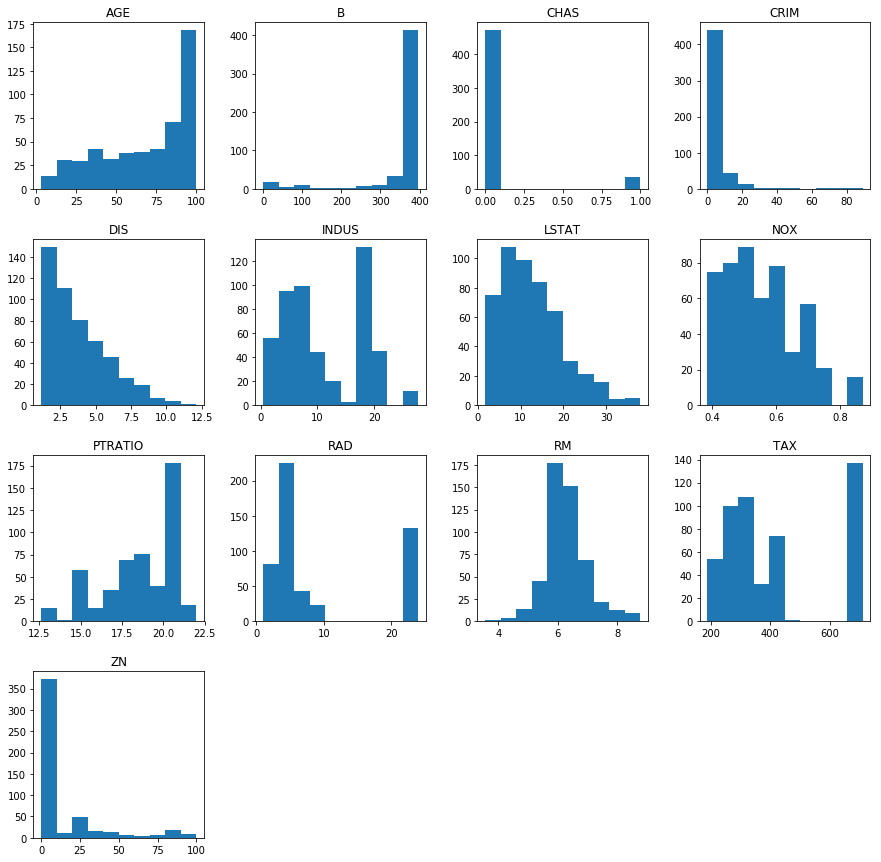

In [9]:
"""
Visualize the data using histogram,
pandas have a nice function hist()
here is the link for more info: 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
"""
data_housing.hist(grid=False, figsize=(15,15))
a = 1

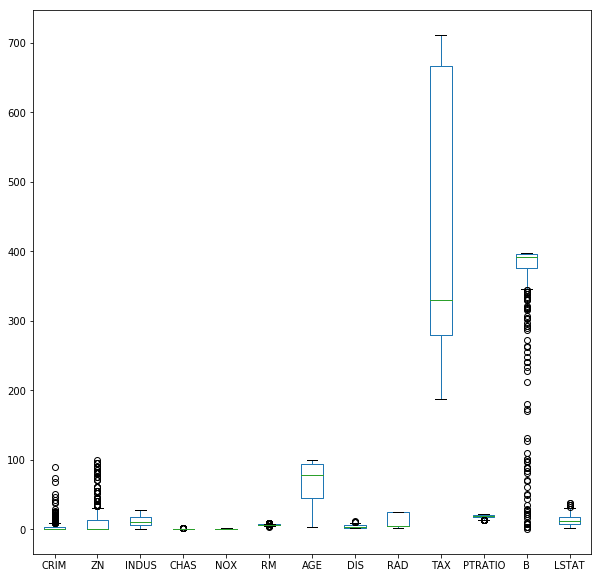

In [10]:
"""
Use boxplot to display the data in feature
"""
data_housing.boxplot(grid=False, figsize=(10,10))

In [13]:
"""
Use min-max scaler to scale the data
"""
minmax_scaler = MinMaxScaler()
minmax_scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

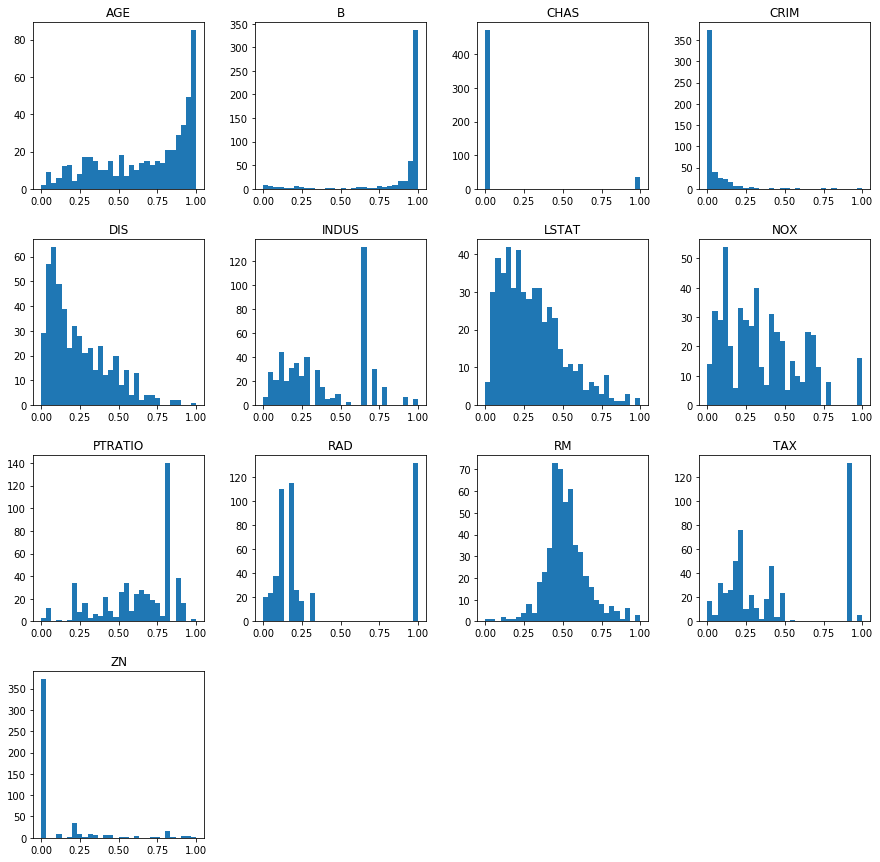

In [17]:
Xclean_minmax = minmax_scaler.fit_transform(X)
df_scaled = pd.DataFrame(Xclean_minmax, columns=feature_names)
df_scaled.hist(bins = 30,  grid=False, figsize=(15,15))
a = 1

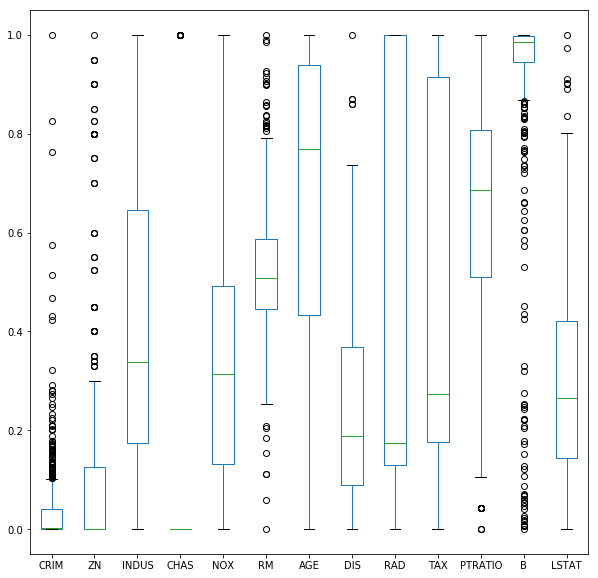

In [18]:
"""
Use boxplot to display the data in feature
"""
df_scaled.boxplot(grid=False, figsize=(8, 8))

In [19]:
# add target column to the dataframe
data_housing['PRED COST'] = boston_data.target 
data_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRED COST
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
# Display top 5 rows
data_housing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRED COST
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


## Regression
Update the models 

In [21]:
"""
Create a linear regression model
"""
reg_model = LinearRegression()

In [22]:
# train_test_split using sklearn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [23]:
X_train.shape

(339, 13)

In [24]:
X_test.shape

(167, 13)

In [25]:
y_train.shape

(339,)

In [26]:
## after the train test split, use the linear regression 
reg_model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
# Calculate the predictive accuracy of training dataset
training_accuracy = reg_model.score(X_train, y_train)

In [28]:
# Calculate the predictive accuracy of test dataset
test_accuracy = reg_model.score(X_test, y_test)

In [32]:
# Prediction using Linear regression model

pred_y = reg_model.predict(X_test)

In [33]:
# Print the stats 
print("Train Accuracy %.02f" % training_accuracy)
print("Test Accuracy %.02f" % test_accuracy)

Train Accuracy 0.74
Test Accuracy 0.73


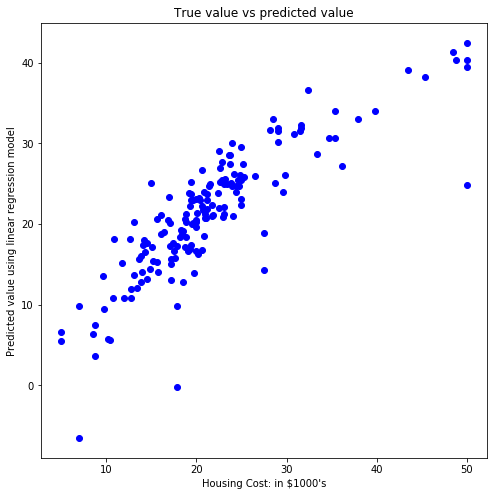

In [34]:
#Plot the Scatter plots to show the predictions

plt.scatter(y_test, pred_y, c = 'b') 
plt.xlabel("Housing Cost: in $1000's") 
plt.ylabel("Predicted value using linear regression model") 
plt.title("True value vs predicted value") 
plt.show()

In [43]:
## Linear Model trained with L1 prior as regularizer (aka the Lasso)
lasso_model = Lasso(alpha=0.1, max_iter = 2000)
lasso_model

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=2000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
# In this section we will use the Lasso regression model to train and predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# train the model
lasso_model.fit(X_train, y_train)

# Calculate the predictive accuracy of training dataset
# scoe method will returns the coefficient of determination R^2 of the prediction.
training_acc_lasso = lasso_model.score(X_train, y_train)

# Calculate the predictive accuracy of test dataset
test_acc_lasso = lasso_model.score(X_test, y_test)

# Print the stats 
print("Train Accuracy %.02f" % training_acc_lasso)
print("Test Accuracy %.02f" % test_acc_lasso)

print(lasso_model.coef_)

pred_lasso_model = lasso_model.predict(X_test)

Train Accuracy 0.73
Test Accuracy 0.70
[-0.11621593  0.04163929 -0.0218949   1.73588239 -0.          3.68084761
 -0.02707188 -1.24007073  0.21427949 -0.01045183 -0.70264226  0.01235152
 -0.60766973]


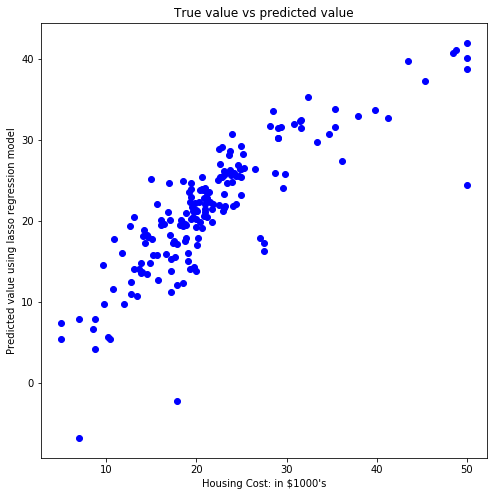

In [47]:
#Plot the Scatter plots to show the predictions

plt.scatter(y_test, pred_lasso_model, c = 'b') 
plt.xlabel("Housing Cost: in $1000's") 
plt.ylabel("Predicted value using lasso regression model") 
plt.title("True value vs predicted value") 
plt.show()

## GridsearchCV

In [2]:
"""
Grid search for regression. 
Optimizes over the parameter space and a set of decision thresholds for classification
PARAMS:
    estimator: type of model 
    paramsdict: space of parameters to search
    thres: set of thresholds to use
    X: all feature data 
    y: all target data 
    nsplits: number of cross validation folds
    test_size: proportion of the data to hold out for testing
"""
def performGridRegressionSearchCV(estimator, paramsdict, thres, X, y, nsplits=3, test_size=0.25):
    paramnames = paramsdict.keys()
    paramvals = paramsdict.values()
    
    # Determine all the permutations of parameters
    allparamsets = list(product(*paramvals))
    nprmsets = len(allparamsets)
    #thres = np.arange(-.1,.6,.04)

    models_tpr = np.zeros((nprmsets,nsplits,len(thres)), float)
    models_fpr = np.zeros((nprmsets,nsplits,len(thres)), float)
    models_auc = np.zeros((nprmsets,nsplits), float)

    # Perform stratified k fold cross validation
    skf = StratifiedKFold(n_splits=nsplits)
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=test_size)
    for s, (train, val) in enumerate(skf.split(X_train, y_train)):
        for p, paramset in enumerate(allparamsets):
            currparams = dict( zip(paramnames, paramset) )

            # Train
            estimator.set_params(**currparams)
            estimator.fit(X_train[train,:], y_train[train])

            # Validate the Model
            preds = estimator.predict(X_train[val,:])
            models_auc[p,s] = roc_auc_score(y_train[val], preds)

            # Determine the labels for different thresholds
            inds = [np.where(preds > t)[0] for t in thres]
            # Compute PSS for different thresholds
            for t, i in enumerate(inds):
                prd = np.zeros(preds.shape, float)
                prd[i] = 1 
                pss, tpr, fpr = skillScore(y_train[val], prd, skill='pss')
                models_tpr[p,s,t] = tpr
                models_fpr[p,s,t] = fpr

    # Compute average PSS across the folds for each threshold for all models
    psses = models_tpr - models_fpr
    avg_pss = np.mean(psses, axis=1)
    avg_auc = np.mean(models_auc, axis=1)
    avg_tpr = np.mean(models_tpr, axis=1)
    avg_fpr = np.mean(models_fpr, axis=1)

    mIdx = np.argmax(avg_auc) # get the index of the best parameter set
    best_params = dict( zip(paramnames, allparamsets[mIdx])) # constructs a parameter dict
    tIdx = np.argmax(avg_pss[mIdx]) # get the decision threshold

    # ROC axes
    fpr = avg_fpr[mIdx,:]
    tpr = avg_tpr[mIdx,:]

    plt.figure()
    plt.plot(fpr, tpr)
    plt.title('ROC Curve')
    plt.ylabel('Average TPR')
    plt.xlabel('Average FPR')
    plt.savefig('bestparams_roc', bbox_inches="tight")
    #plt text of AUC on plot

    # Construct model from all the training data, using the best parameters
    estimator.set_params(**best_params)
    estimator.fit(X_train, y_train)
    
    # Test the model and make the predictions binary
    preds = estimator.predict(X_test)
    preds[preds > thres[tIdx]] = 1
    preds[preds <= thres[tIdx]] = 0
    
    # Confusion Matrix
    cmtx = confusion_matrix(y_test, preds)
    plot_confusion_matrix(cmtx, target_names)
    
    # Training statistics for the best threshold and parameter set
    b_avg_pss = np.mean(models_tpr[mIdx,:,tIdx] - models_fpr[mIdx,:,tIdx])
    b_std_pss = np.std(models_tpr[mIdx,:,tIdx] - models_fpr[mIdx,:,tIdx])
    
    print ("Best Parameters")
    print (best_params)
    print ("Average Training PSS %.04f" % b_avg_pss)
    print ("STD Training PSS %.04f" % b_std_pss)
    print ("Best Model Test PSS %.04f" % skillScore(y_test, preds, 'pss')[0])
    print ("Best Model Test Accuracy %.04f" % skillScore(y_test, preds, 'acc'))
    
    return estimator